In [34]:
#Import Libraries

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

In [38]:
#Import all the datasets 

df1 = pd.read_csv('./data/products.csv')
df2 = pd.read_csv('./data/aisles.csv')
df3 = pd.read_csv('./data/departments.csv')
df4 = pd.read_csv('./data/order_products__train.csv')
df5 = pd.read_csv('./data/orders.csv')

In [40]:
#Merge all these datasets into a single df for further data analysis and EDA
df1_2 = pd.merge(df2, df1, how='inner', on='aisle_id')
df12_3 = pd.merge(df1_2, df3, how='inner', on='department_id')
df123_4 = pd.merge(df4, df12_3, how='inner', on='product_id')
df1234_5 = pd.merge(df5, df123_4, how='inner', on='order_id')

In [44]:
df1234_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   eval_set                1384617 non-null  object 
 3   order_number            1384617 non-null  int64  
 4   order_dow               1384617 non-null  int64  
 5   order_hour_of_day       1384617 non-null  int64  
 6   days_since_prior_order  1384617 non-null  float64
 7   product_id              1384617 non-null  int64  
 8   add_to_cart_order       1384617 non-null  int64  
 9   reordered               1384617 non-null  int64  
 10  aisle_id                1384617 non-null  int64  
 11  aisle                   1384617 non-null  object 
 12  product_name            1384617 non-null  object 
 13  department_id           1384617 non-null  int64  
 14  de

In [80]:
#Drop irrelevant columns
data_cleaned = df1234_5.drop(['aisle_id','department_id','eval_set'],axis=1)

In [82]:
data_cleaned

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,11,4,8,14.0,196,1,1,soft drinks,Soda,beverages
1,1187899,1,11,4,8,14.0,25133,2,1,packaged cheese,Organic String Cheese,dairy eggs
2,1187899,1,11,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs
3,1187899,1,11,4,8,14.0,26405,4,1,paper goods,XL Pick-A-Size Paper Towel Rolls,household
4,1187899,1,11,4,8,14.0,39657,5,1,candy chocolate,Milk Chocolate Almonds,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,14,6,14,30.0,40603,4,0,laundry,Fabric Softener Sheets,household
1384613,272231,206209,14,6,14,30.0,15655,5,0,candy chocolate,Dark Chocolate Mint Snacking Chocolate,snacks
1384614,272231,206209,14,6,14,30.0,42606,6,0,ice cream ice,Phish Food Frozen Yogurt,frozen
1384615,272231,206209,14,6,14,30.0,37966,7,0,bread,French Baguette Bread,bakery


In [84]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_number            1384617 non-null  int64  
 3   order_dow               1384617 non-null  int64  
 4   order_hour_of_day       1384617 non-null  int64  
 5   days_since_prior_order  1384617 non-null  float64
 6   product_id              1384617 non-null  int64  
 7   add_to_cart_order       1384617 non-null  int64  
 8   reordered               1384617 non-null  int64  
 9   aisle                   1384617 non-null  object 
 10  product_name            1384617 non-null  object 
 11  department              1384617 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 126.8+ MB


In [54]:
#Perform Basic EDA for the data

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/417355546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned['order_dow'], palette='viridis')


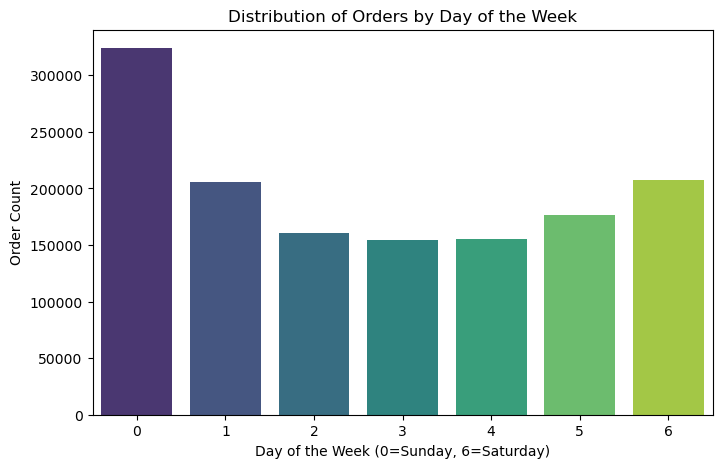

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=data_cleaned['order_dow'], palette='viridis')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Order Count')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/269850526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned['order_hour_of_day'], palette='mako')


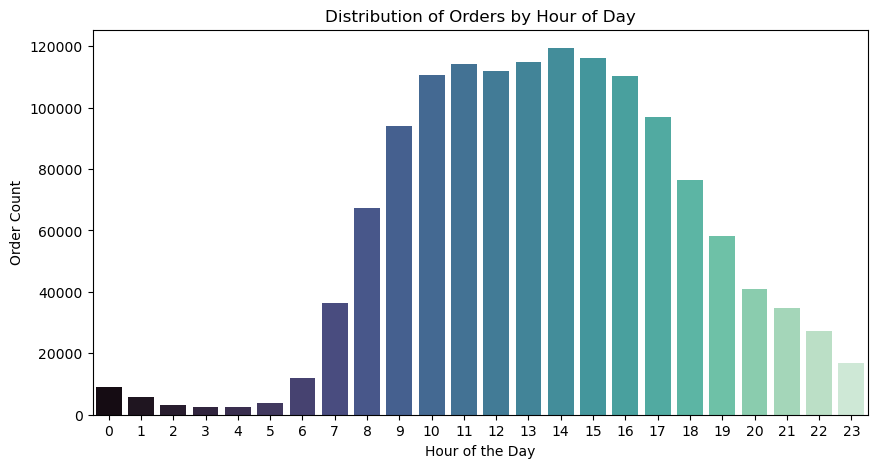

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x=data_cleaned['order_hour_of_day'], palette='mako')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.xticks(range(0, 24))
plt.show()


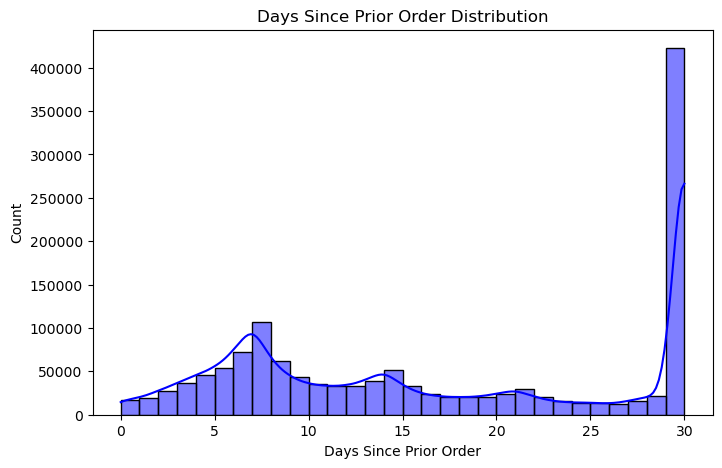

In [90]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['days_since_prior_order'], bins=30, kde=True, color='blue')
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Count')
plt.show()


/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/1105057196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


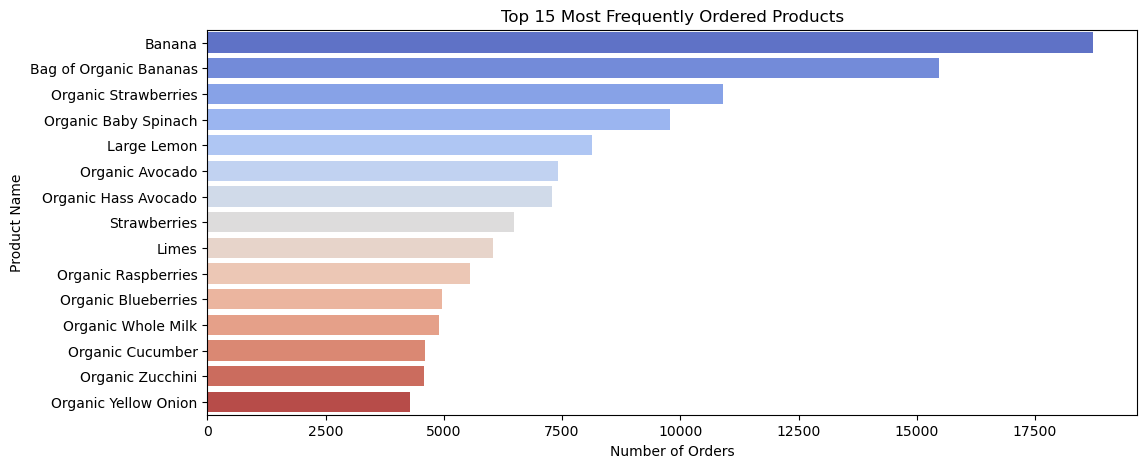

In [92]:
top_products = data_cleaned['product_name'].value_counts().head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 15 Most Frequently Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/1234542109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_cleaned['reordered'].value_counts().index, y=data_cleaned['reordered'].value_counts().values, palette='Set2')


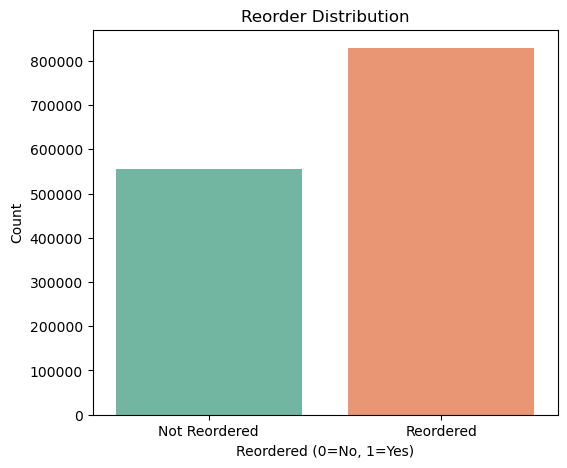

In [94]:
plt.figure(figsize=(6,5))
sns.barplot(x=data_cleaned['reordered'].value_counts().index, y=data_cleaned['reordered'].value_counts().values, palette='Set2')
plt.title('Reorder Distribution')
plt.xlabel('Reordered (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Reordered', 'Reordered'])
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/1135652737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='rocket')


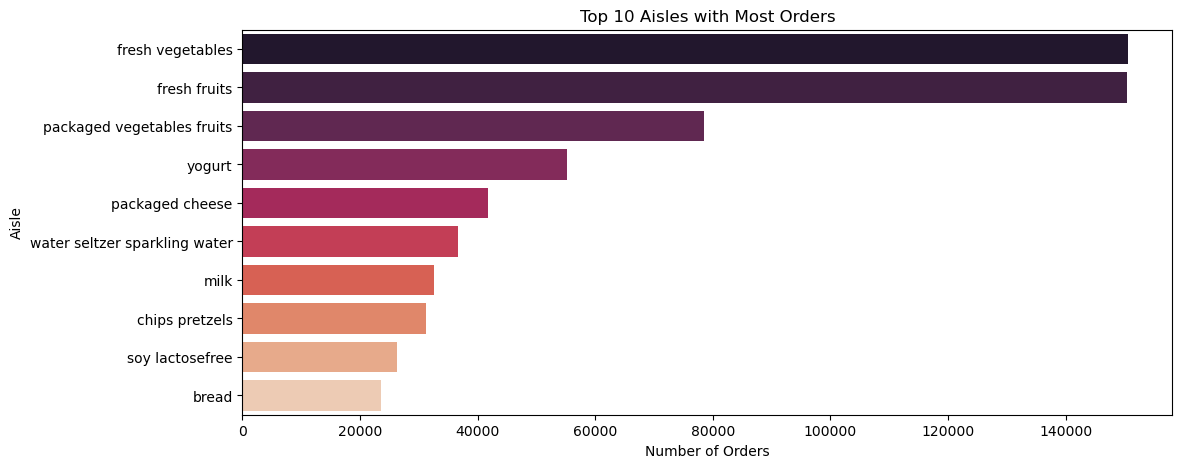

In [96]:
top_aisles = data_cleaned['aisle'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_aisles.values, y=top_aisles.index, palette='rocket')
plt.title('Top 10 Aisles with Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Aisle')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/636066962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_departments.values, y=top_departments.index, palette='deep')


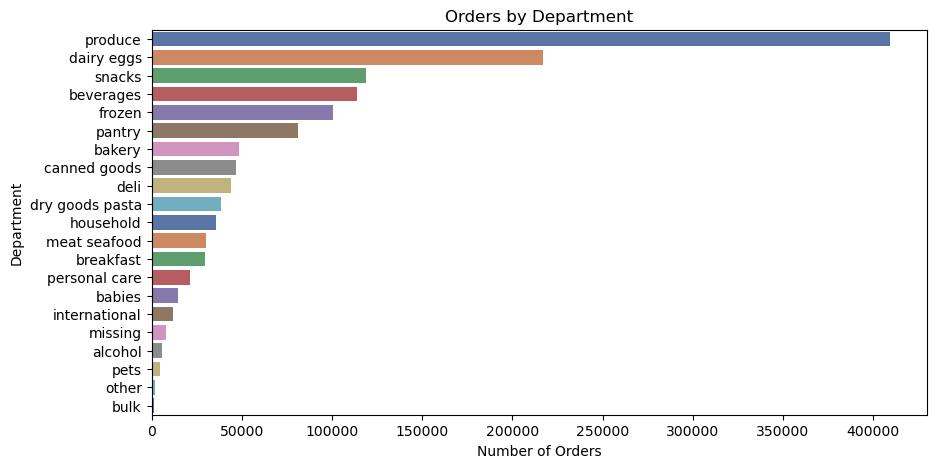

In [98]:
top_departments = data_cleaned['department'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=top_departments.values, y=top_departments.index, palette='deep')
plt.title('Orders by Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()

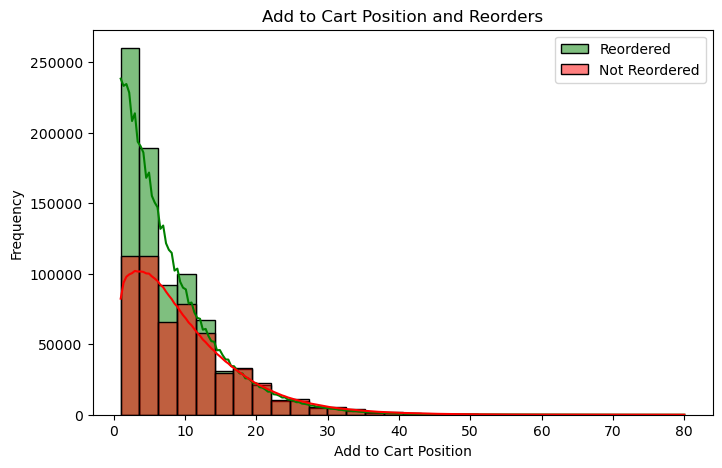

In [100]:
plt.figure(figsize=(8,5))
sns.histplot(data_cleaned[data_cleaned['reordered'] == 1]['add_to_cart_order'], bins=30, kde=True, color='green', label='Reordered')
sns.histplot(data_cleaned[data_cleaned['reordered'] == 0]['add_to_cart_order'], bins=30, kde=True, color='red', label='Not Reordered')
plt.title('Add to Cart Position and Reorders')
plt.xlabel('Add to Cart Position')
plt.ylabel('Frequency')
plt.legend()
plt.show()

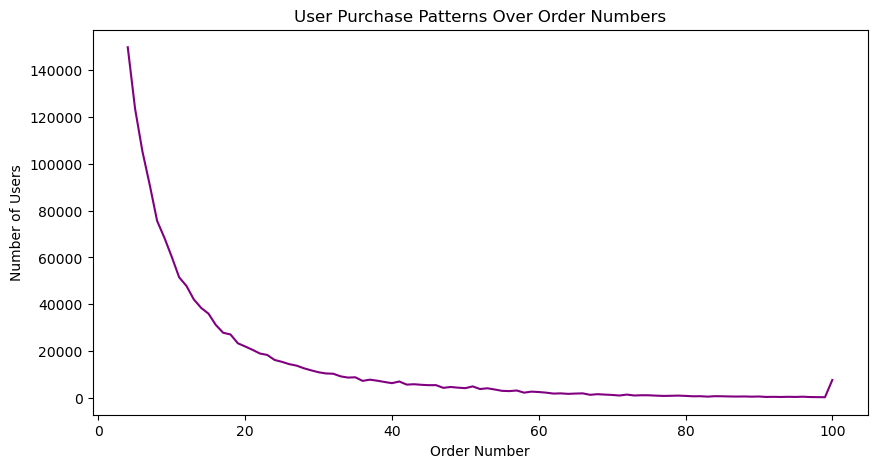

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_cleaned.groupby('order_number').size(), color='purple')
plt.title('User Purchase Patterns Over Order Numbers')
plt.xlabel('Order Number')
plt.ylabel('Number of Users')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/3366408782.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = segment_reorder_rate.groupby('segment')['reordered'].mean().reset_index()
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/3366408782.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis['segment'], y=segment_analysis['reordered'], palette='viridis')


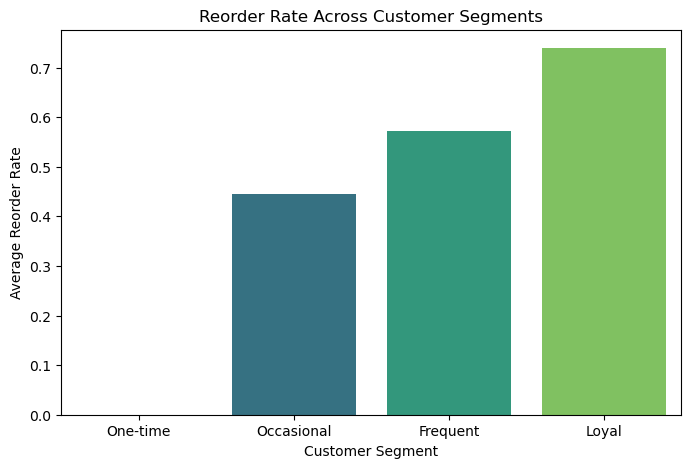

In [104]:
customer_orders = data_cleaned.groupby('user_id')['order_number'].max().reset_index()
customer_orders['segment'] = pd.cut(customer_orders['order_number'], 
                                    bins=[0,1,5,15,float('inf')], 
                                    labels=['One-time', 'Occasional', 'Frequent', 'Loyal'])

segment_reorder_rate = data_cleaned.groupby('user_id')['reordered'].mean().reset_index()
segment_reorder_rate = segment_reorder_rate.merge(customer_orders, on='user_id')
segment_analysis = segment_reorder_rate.groupby('segment')['reordered'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=segment_analysis['segment'], y=segment_analysis['reordered'], palette='viridis')
plt.title('Reorder Rate Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average Reorder Rate')
plt.show()

In [106]:
#Data Preprocessing

In [108]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   order_number            1384617 non-null  int64  
 3   order_dow               1384617 non-null  int64  
 4   order_hour_of_day       1384617 non-null  int64  
 5   days_since_prior_order  1384617 non-null  float64
 6   product_id              1384617 non-null  int64  
 7   add_to_cart_order       1384617 non-null  int64  
 8   reordered               1384617 non-null  int64  
 9   aisle                   1384617 non-null  object 
 10  product_name            1384617 non-null  object 
 11  department              1384617 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 126.8+ MB


In [110]:
#Build a simple content based recommendation model

In [112]:
#Import the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
# Select relevant columns for recommendation
df_cleaned = data_cleaned[['product_id', 'product_name', 'aisle', 'department']]

In [116]:
df_cleaned

,product_id,product_name,aisle,department
0,196,Soda,soft drinks,beverages
1,25133,Organic String Cheese,packaged cheese,dairy eggs
2,38928,0% Greek Strained Yogurt,yogurt,dairy eggs
3,26405,XL Pick-A-Size Paper Towel Rolls,paper goods,household
4,39657,Milk Chocolate Almonds,candy chocolate,snacks
...,...,...,...,...
1384612,40603,Fabric Softener Sheets,laundry,household
1384613,15655,Dark Chocolate Mint Snacking Chocolate,candy chocolate,snacks
1384614,42606,Phish Food Frozen Yogurt,ice cream ice,frozen
1384615,37966,French Baguette Bread,bread,bakery


In [118]:
# Drop duplicates (if any)
df_cleaned = df_cleaned.drop_duplicates(subset=['product_id'])

In [120]:
df_cleaned

,product_id,product_name,aisle,department
0,196,Soda,soft drinks,beverages
1,25133,Organic String Cheese,packaged cheese,dairy eggs
2,38928,0% Greek Strained Yogurt,yogurt,dairy eggs
3,26405,XL Pick-A-Size Paper Towel Rolls,paper goods,household
4,39657,Milk Chocolate Almonds,candy chocolate,snacks
...,...,...,...,...
1383887,22165,Chewy Reduced Sugar Granola Bars Variety Pack,breakfast bars pastries,breakfast
1383996,31540,Plain Flavor Probiotic Acidophilus,digestion,personal care
1384187,44507,"100% Juice, Rio Red Grapefruit",juice nectars,beverages
1384253,47814,Puppy Complete Nutrition Chicken & Beef Dinner...,dog food care,pets


In [122]:
# Combine product-related features into a single text field
df_cleaned['combined_features'] = df_cleaned['product_name'] + " " + df_cleaned['aisle'] + " " + df_cleaned['department']

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_47200/1492985016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_features'] = df_cleaned['product_name'] + " " + df_cleaned['aisle'] + " " + df_cleaned['department']


In [124]:
df_cleaned

,product_id,product_name,aisle,department,combined_features
0,196,Soda,soft drinks,beverages,Soda soft drinks beverages
1,25133,Organic String Cheese,packaged cheese,dairy eggs,Organic String Cheese packaged cheese dairy eggs
2,38928,0% Greek Strained Yogurt,yogurt,dairy eggs,0% Greek Strained Yogurt yogurt dairy eggs
3,26405,XL Pick-A-Size Paper Towel Rolls,paper goods,household,XL Pick-A-Size Paper Towel Rolls paper goods h...
4,39657,Milk Chocolate Almonds,candy chocolate,snacks,Milk Chocolate Almonds candy chocolate snacks
...,...,...,...,...,...
1383887,22165,Chewy Reduced Sugar Granola Bars Variety Pack,breakfast bars pastries,breakfast,Chewy Reduced Sugar Granola Bars Variety Pack ...
1383996,31540,Plain Flavor Probiotic Acidophilus,digestion,personal care,Plain Flavor Probiotic Acidophilus digestion p...
1384187,44507,"100% Juice, Rio Red Grapefruit",juice nectars,beverages,"100% Juice, Rio Red Grapefruit juice nectars b..."
1384253,47814,Puppy Complete Nutrition Chicken & Beef Dinner...,dog food care,pets,Puppy Complete Nutrition Chicken & Beef Dinner...


In [148]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [150]:
df_cleaned

,product_id,product_name,aisle,department,combined_features
0,196,Soda,soft drinks,beverages,Soda soft drinks beverages
1,25133,Organic String Cheese,packaged cheese,dairy eggs,Organic String Cheese packaged cheese dairy eggs
2,38928,0% Greek Strained Yogurt,yogurt,dairy eggs,0% Greek Strained Yogurt yogurt dairy eggs
3,26405,XL Pick-A-Size Paper Towel Rolls,paper goods,household,XL Pick-A-Size Paper Towel Rolls paper goods h...
4,39657,Milk Chocolate Almonds,candy chocolate,snacks,Milk Chocolate Almonds candy chocolate snacks
...,...,...,...,...,...
39118,22165,Chewy Reduced Sugar Granola Bars Variety Pack,breakfast bars pastries,breakfast,Chewy Reduced Sugar Granola Bars Variety Pack ...
39119,31540,Plain Flavor Probiotic Acidophilus,digestion,personal care,Plain Flavor Probiotic Acidophilus digestion p...
39120,44507,"100% Juice, Rio Red Grapefruit",juice nectars,beverages,"100% Juice, Rio Red Grapefruit juice nectars b..."
39121,47814,Puppy Complete Nutrition Chicken & Beef Dinner...,dog food care,pets,Puppy Complete Nutrition Chicken & Beef Dinner...


In [126]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Convert text data into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df_cleaned['combined_features'])

In [128]:
# Compute cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [132]:
#Now define a recomm system:

In [156]:
def recommend_products(product_name, df, cosine_sim):
    # Find the index of the product
    idx = df[df['product_name'].str.lower() == product_name.lower()].index
    if len(idx) == 0:
        return "Product not found!"
    idx = idx[0]
    
    # Get similarity scores for the selected product
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort products based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top 5 most similar products (excluding the input product itself)
    top_products = sim_scores[1:6]
    
    # Retrieve product names
    product_indices = [i[0] for i in top_products]
    return df.iloc[product_indices][['product_id', 'product_name','aisle', 'department']]

In [232]:
# Example: Get recommendations for a sample product
recommend_products("Organic Aromatherapeutic Moroccan Argan Oil Set", df_cleaned, cosine_sim)

,product_id,product_name,aisle,department
15818,18290,Moroccan Argan Oil Shampoo,hair care,personal care
29997,34052,Moroccan Argan Oil Conditioner,hair care,personal care
10255,20857,Argan Oil 100% USDA Organic Moroccan,hair care,personal care
36144,29963,Moroccan Argan Oil Renewing Shampoo,hair care,personal care
27045,38743,Moroccan Argan Creme Conditioner,hair care,personal care
